In [2]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

In [3]:
df.head(2)

,value
0,88
1,84


## Find the proper order of differencing in ARIMA model

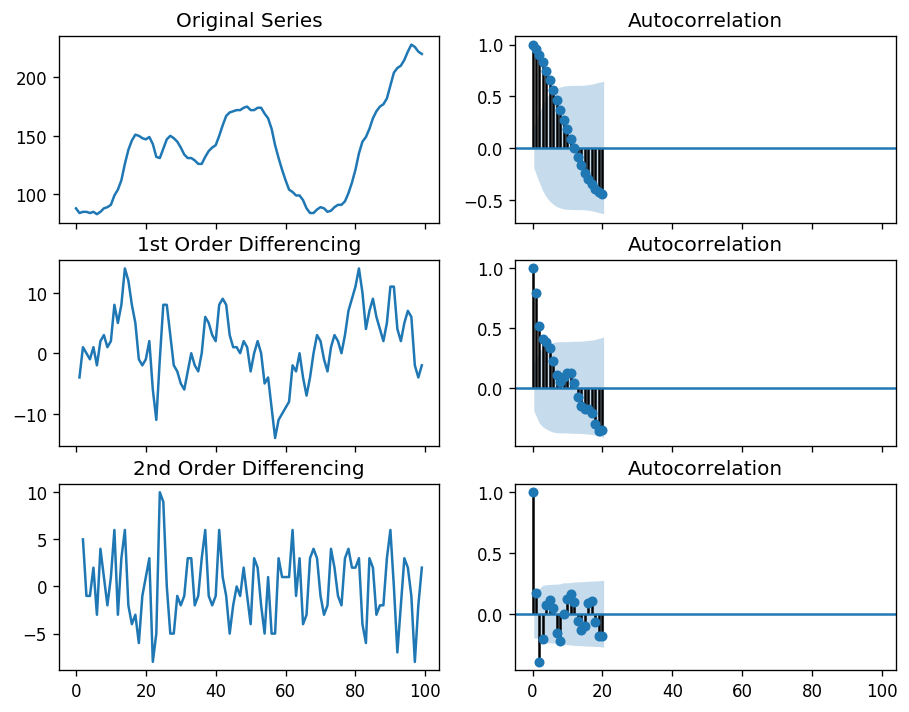

In [4]:
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])
# value.diff()


# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])
# value.diff().diff()

plt.show()

In [7]:
from pmdarima.arima.utils import ndiffs

y = df.value

## Adf Test
ndiffs(y, test='adf')

2

## Find proper p for AR model

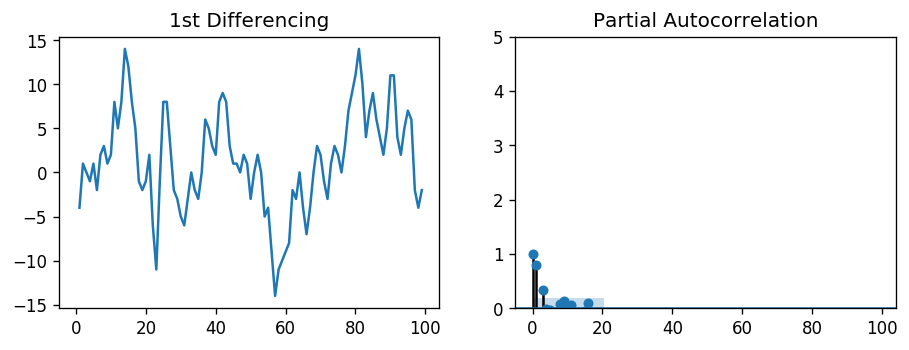

In [8]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.value.diff().dropna(), ax=axes[1])

plt.show()

## Fine proper q for MR model

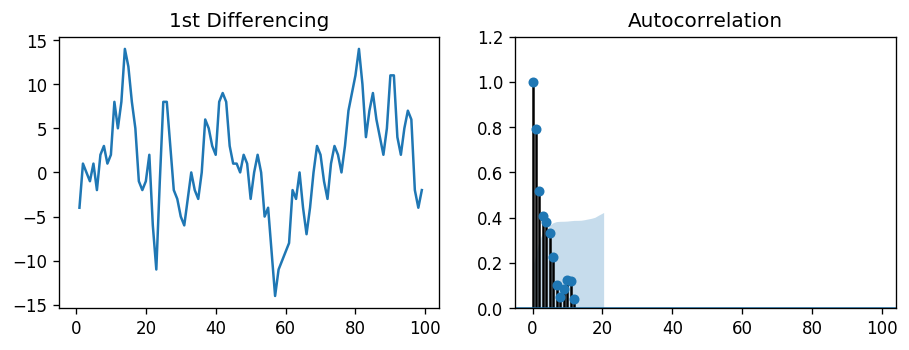

In [9]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.value.diff().dropna(), ax=axes[1])

plt.show()

## Build a ARIMR model

In [10]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
# p d q 
model = ARIMA(df.value, order=(2,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                   99
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -253.366
Method:                       css-mle   S.D. of innovations              3.105
Date:                Sat, 06 Jun 2020   AIC                            518.731
Time:                        07:28:04   BIC                            534.302
Sample:                             1   HQIC                           525.031
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.0483      1.528      0.686      0.493      -1.947       4.044
ar.L1.D.value     1.1943      0.351      3.403      0.001       0.507       1.882
ar.L2.D.value    -0.3077      0.254     

In [11]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
# p d q 
model = ARIMA(df.value, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                   99
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -253.790
Method:                       css-mle   S.D. of innovations              3.119
Date:                Sat, 06 Jun 2020   AIC                            517.579
Time:                        07:28:57   BIC                            530.555
Sample:                             1   HQIC                           522.829
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.1202      1.290      0.868      0.385      -1.409       3.649
ar.L1.D.value     0.6351      0.257      2.469      0.014       0.131       1.139
ma.L1.D.value     0.5287      0.355     

In [12]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
# p d q 
model = ARIMA(df.value, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                   99
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -253.790
Method:                       css-mle   S.D. of innovations              3.119
Date:                Sat, 06 Jun 2020   AIC                            515.579
Time:                        07:29:20   BIC                            525.960
Sample:                             1   HQIC                           519.779
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.1205      1.286      0.871      0.384      -1.400       3.641
ar.L1.D.value     0.6344      0.087      7.317      0.000       0.464       0.804
ma.L1.D.value     0.5297      0.089     

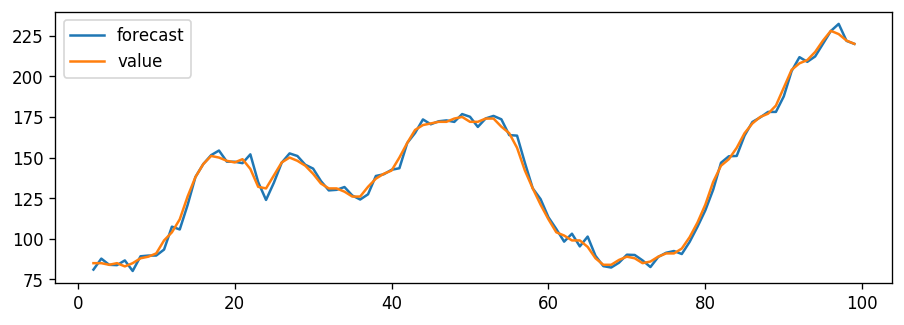

In [13]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [14]:
df.shape

(100, 1)

## Train & Test  Out of sample forecast

In [15]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df.value[:85]
test = df.value[85:]

In [21]:
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.value   No. Observations:                   84
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -216.887
Method:                       css-mle   S.D. of innovations              3.174
Date:                Sat, 06 Jun 2020   AIC                            441.775
Time:                        07:42:24   BIC                            451.498
Sample:                             1   HQIC                           445.683
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.8435      1.446      0.583      0.560      -1.991       3.678
ar.L1.D.value     0.6528      0.095      6.899      0.000       0.467       0.838
ma.L1.D.value     0.4877      0.106      4.616      0.000       0.281       0.695
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5319           +0.0000j            1.5319            0.0000
MA.1           -2.0506           +0.0000j            2.0506            0.5000
-----------------------------------------------------------------------------
"""

In [17]:
fc, se, conf = fitted.forecast(15, alpha=0.05)  # 95% conf

In [19]:
# fc- predict value se-residual conf- interval confidence

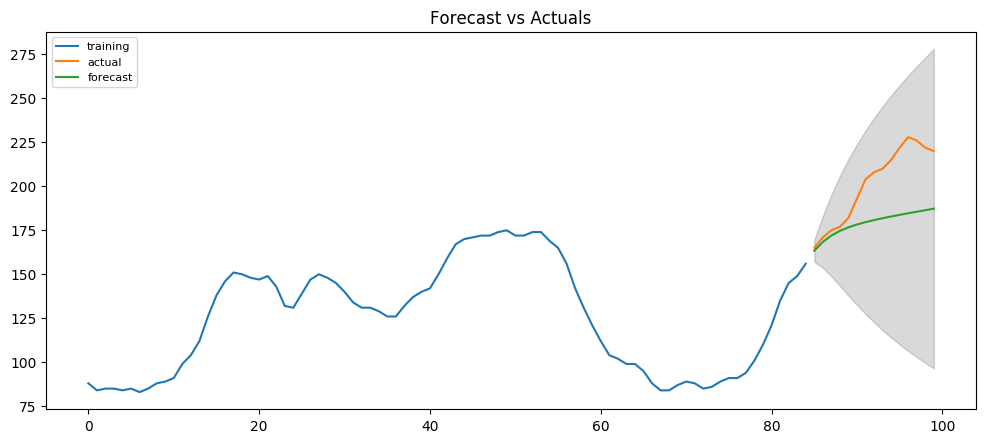

In [20]:
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15) ## interval confidence

plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
# But each of the predicted forecasts is consistently below the actuals.  add some value to the prediction

                             ARIMA Model Results                              
Dep. Variable:               D2.value   No. Observations:                   83
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -214.248
Method:                       css-mle   S.D. of innovations              3.153
Date:                Sat, 06 Jun 2020   AIC                            440.497
Time:                        07:45:38   BIC                            455.010
Sample:                             2   HQIC                           446.327
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0483      0.084      0.577      0.564      -0.116       0.212
ar.L1.D2.value     1.1386      0.109     10.399      0.000       0.924       1.353
ar.L2.D2.value    -0.5923      0.155

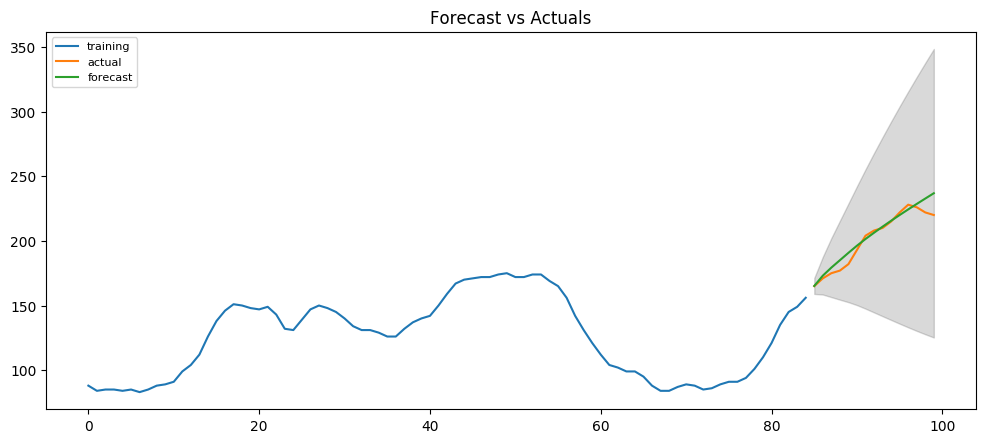

In [27]:
model = ARIMA(train, order=(3, 2, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(15, alpha=0.05)  # 95% conf  # next 15 

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

## Evaluation the model

In [28]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

/Users/apple/PycharmProjects/PRACTICE/venv/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


{'mape': 0.022501399822006458,
 'me': 3.2308328837414044,
 'mae': 4.548339935320668,
 'mpe': 0.016421235263543717,
 'rmse': 6.373270368942403,
 'acf1': 0.5105497507243095,
 'corr': 0.9674576346384004,
 'minmax': 0.02163162413241848}

In [ ]:
# Around 2.2% MAPE implies the model is about 97.8% accurate in predicting the next 15 observations.

In [ ]:
# if you are comparing forecasts of two different series, the MAPE, Correlation and Min-Max Error can be used.

# Bthe above three are percentage errors that vary between 0 and 1. 

## Auto Arima Forecast 

In [30]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
Fit ARIMA(1,2,1)x(0,0,0,0) [intercept=True]; AIC=525.587, BIC=535.926, Time=0.142 seconds
Fit ARIMA(0,2,0)x(0,0,0,0) [intercept=True]; AIC=533.474, BIC=538.644, Time=0.016 seconds
Fit ARIMA(1,2,0)x(0,0,0,0) [intercept=True]; AIC=532.437, BIC=540.192, Time=0.043 seconds
Fit ARIMA(0,2,1)x(0,0,0,0) [intercept=True]; AIC=525.893, BIC=533.648, Time=0.066 seconds
Fit ARIMA(0,2,0)x(0,0,0,0) [intercept=False]; AIC=531.477, BIC=534.062, Time=0.020 seconds
Fit ARIMA(2,2,1)x(0,0,0,0) [intercept=True]; AIC=515.248, BIC=528.173, Time=0.103 seconds
Fit ARIMA(2,2,0)x(0,0,0,0) [intercept=True]; AIC=513.459, BIC=523.799, Time=0.067 seconds
Fit ARIMA(3,2,0)x(0,0,0,0) [intercept=True]; AIC=515.284, BIC=528.209, Time=0.102 seconds
Fit ARIMA(3,2,1)x(0,0,0,0) [intercept=True]; AIC=512.553, BIC=528.063, Time=0.763 seconds
Near non-invertible roots for order (3, 2, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit cir

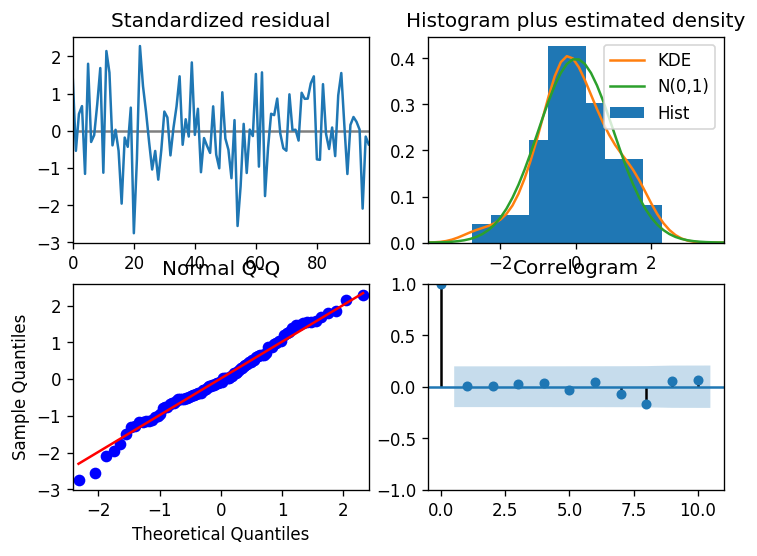

In [31]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

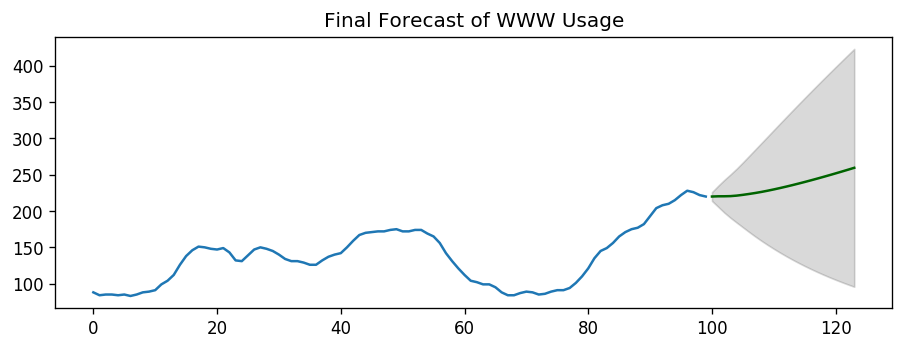

In [32]:
# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.value), len(df.value)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.value)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of WWW Usage")
plt.show()

In [ ]:
## the problem of plain ARIMA model is it does not support seasonality.

In [33]:
# Import
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

In [34]:
data.head(2)

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891


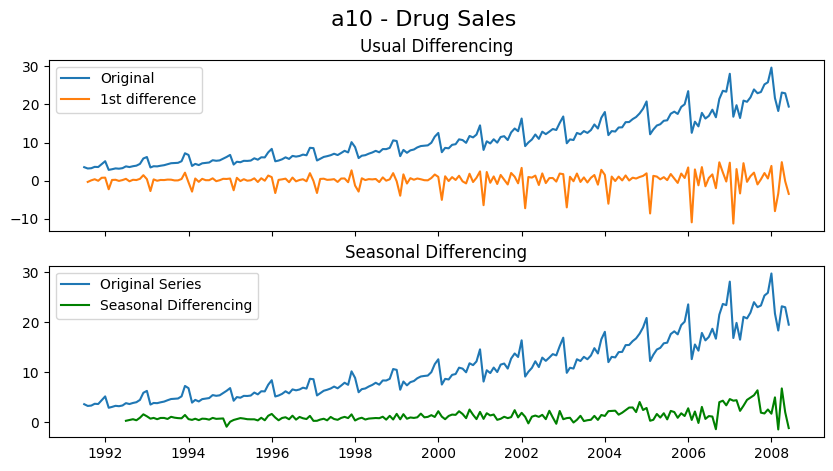

In [41]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

axes[0].plot(data[:],label='Original')
axes[0].plot(data[:].diff(1),label='1st difference')   # put two line in the same polt
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)

# Seasinal Dei
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')  # Year difference
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('a10 - Drug Sales', fontsize=16)
plt.show()

In [42]:
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,12) [intercept=True]; AIC=534.818, BIC=551.105, Time=1.758 seconds
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=True]; AIC=624.061, BIC=630.576, Time=0.032 seconds
Fit ARIMA(1,0,0)x(1,1,0,12) [intercept=True]; AIC=596.068, BIC=609.098, Time=0.560 seconds
Fit ARIMA(0,0,1)x(0,1,1,12) [intercept=True]; AIC=611.475, BIC=624.505, Time=0.425 seconds
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=False]; AIC=757.274, BIC=760.532, Time=0.037 seconds
Fit ARIMA(1,0,1)x(0,1,0,12) [intercept=True]; AIC=559.407, BIC=572.437, Time=0.343 seconds
Fit ARIMA(1,0,1)x(1,1,1,12) [intercept=True]; AIC=554.381, BIC=573.926, Time=3.388 seconds
Near non-invertible roots for order (1, 0, 1)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(1,0,1)x(0,1,2,12) [intercept=True]; AIC=536.817, BIC=556.362, Time=4.977 seconds
Fit ARIMA(1,0,1)x(1,1,0,12) [intercept=True]; AIC=543.106, BIC=559.39

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  204
Model:             SARIMAX(3, 0, 1)x(1, 1, [1, 2], 12)   Log Likelihood                -250.092
Date:                                 Sat, 06 Jun 2020   AIC                            518.184
Time:                                         08:00:38   BIC                            547.501
Sample:                                              0   HQIC                           530.057
                                                 - 204                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0250      0.033      0.749      0.454      -0.040       0.090
ar.L1         -0.1245      0.149     -0.834      0.404      -0.417       0.168
ar.L2          0.4836      0.061      7.900      0.000       0.364       0.604
ar.L3          0.5244      0.083      6.341      0.000       0.362       0.686
ma.L1          0.1938      0.164      1.184      0.237      -0.127       0.515
ar.S.L12       0.8414      0.123      6.851      0.000       0.601       1.082
ma.S.L12      -1.6405      0.160    -10.271      0.000      -1.954      -1.327
ma.S.L24       0.8329      0.124      6.721      0.000       0.590       1.076
sigma2         0.6945      0.084      8.263      0.000       0.530       0.859
===================================================================================
Ljung-Box (Q):                       61.09   Jarque-Bera (JB):               103.81
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):              12.74   Skew:                             0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

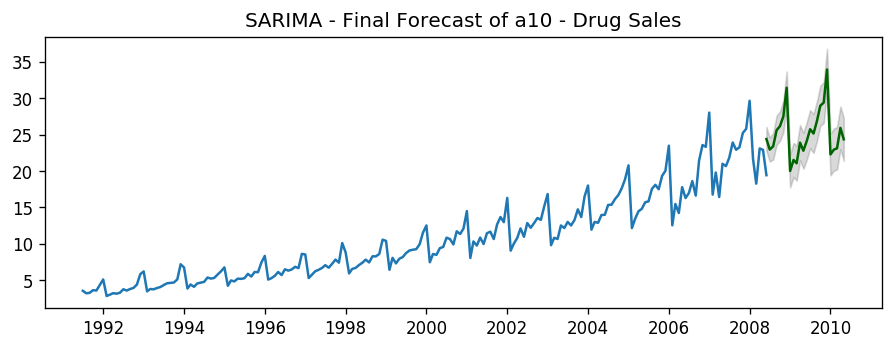

In [43]:
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of a10 - Drug Sales")
plt.show()

## Add an exogenous variable (seasonal index)

In [68]:
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

In [78]:
import matplotlib.pyplot as plt

In [75]:
df.reset_index(inplace=True)

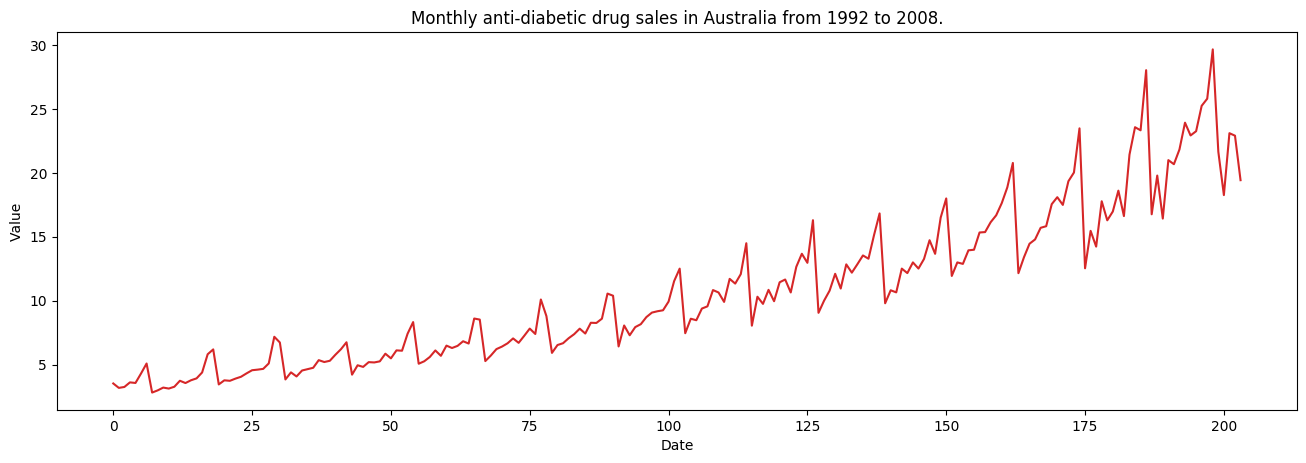

In [79]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')    

In [76]:
df['year']=[d.year for d in df.date]
df['month']=[d.strftime("%b") for d in df.date]
years=df['year'].unique()

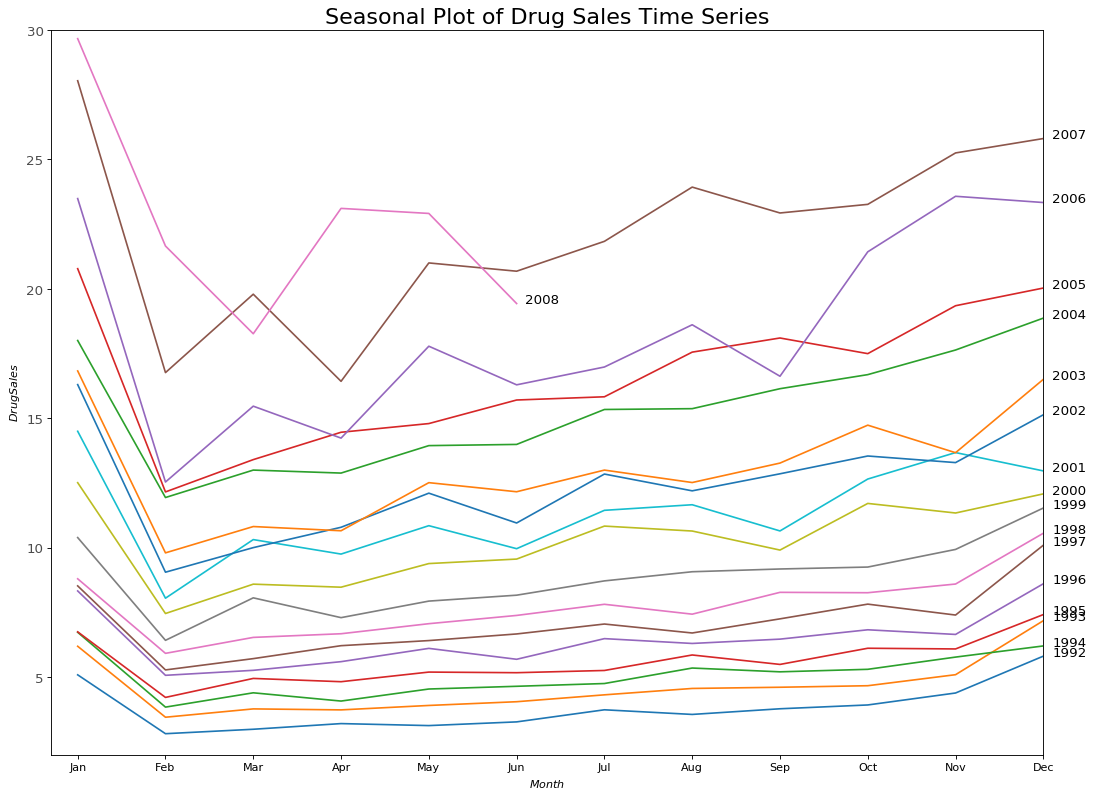

In [82]:
# # Prep Colors
# np.random.seed(100)
# mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'value', data=df.loc[df.year==y, :],  label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12)

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

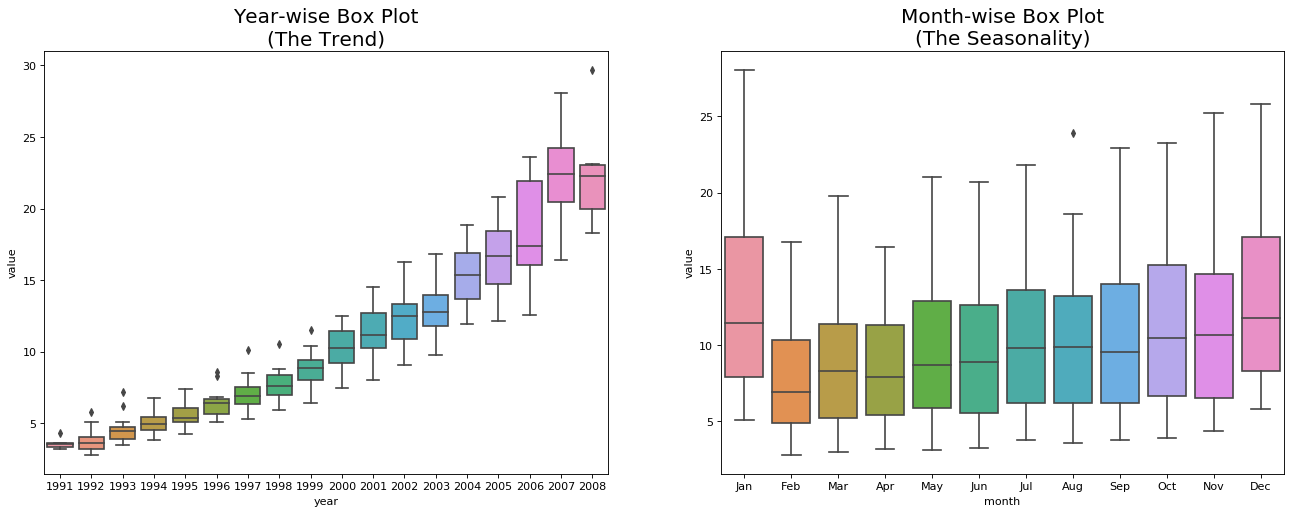

In [84]:
import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

<Figure size 1280x960 with 0 Axes>

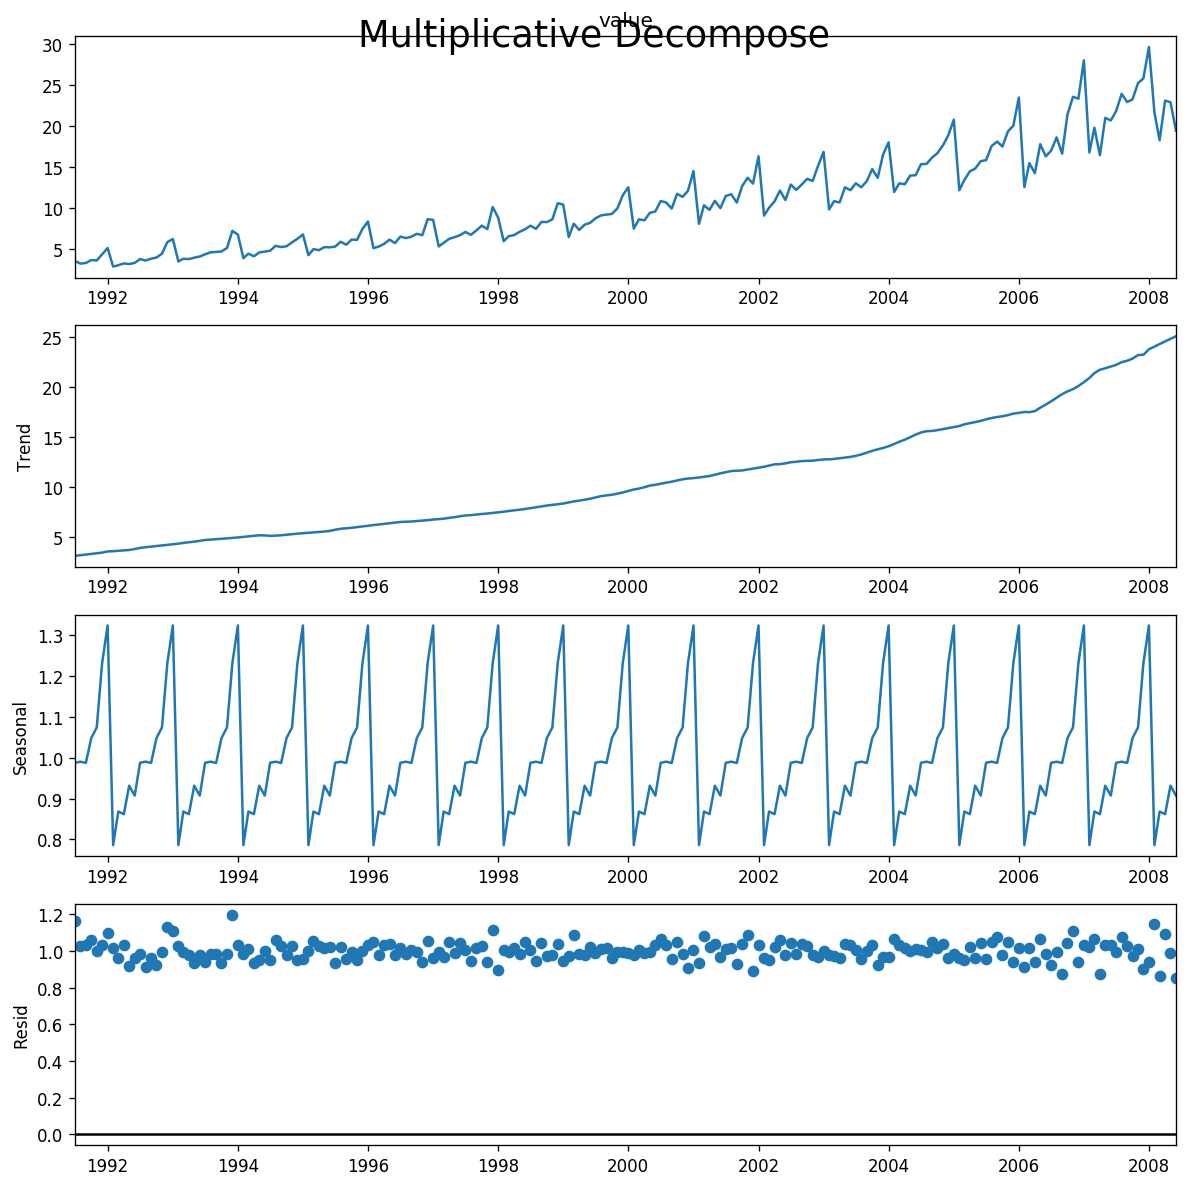

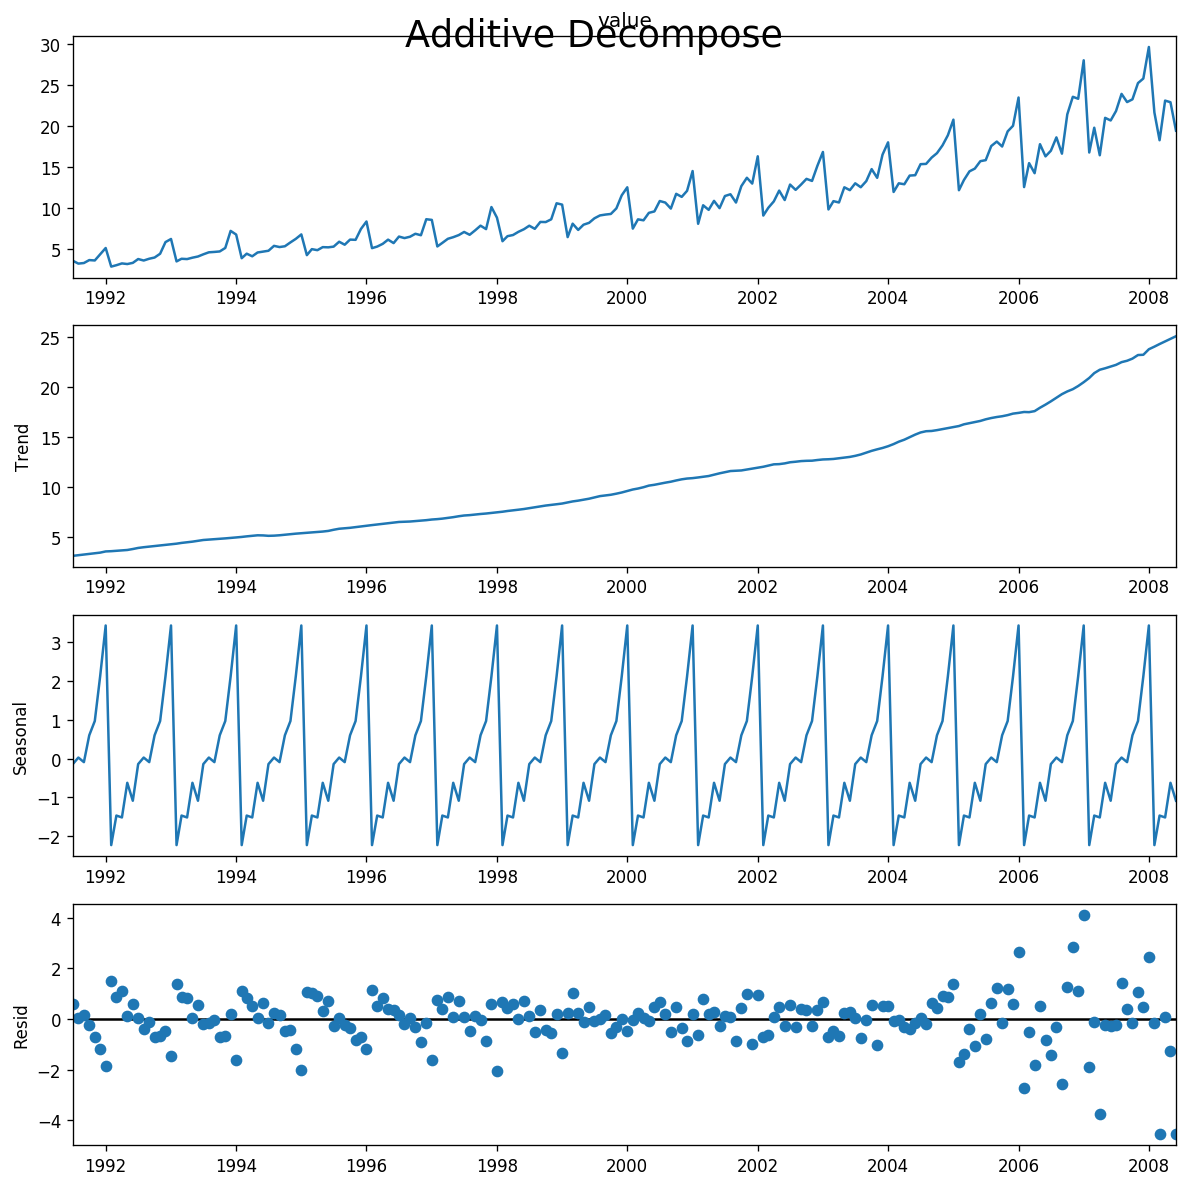

In [88]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

plt.figure(figsize=(16,12), dpi= 80)

# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [69]:
# Compute Seasonal Index
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# multiplicative seasonal component
result_mul = seasonal_decompose(data['value'][-36:],   # 3 years
                                model='multiplicative', 
                                extrapolate_trend='freq')

seasonal_index = result_mul.seasonal[-12:].to_frame()
seasonal_index['month'] = pd.to_datetime(seasonal_index.index).month

# merge with the base data
data['month'] = data.index.month
df = pd.merge(data, seasonal_index, how='left', on='month')
df.columns = ['value', 'month', 'seasonal_index']
df.index = data.index  # reassign the index

In [70]:
import pmdarima as pm

# SARIMAX Model
sxmodel = pm.auto_arima(df[['value']], exogenous=df[['seasonal_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel.summary()

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,12) [intercept=True]; AIC=536.818, BIC=556.362, Time=2.458 seconds
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=True]; AIC=626.061, BIC=635.834, Time=0.080 seconds
Fit ARIMA(1,0,0)x(1,1,0,12) [intercept=True]; AIC=598.068, BIC=614.356, Time=0.880 seconds
Fit ARIMA(0,0,1)x(0,1,1,12) [intercept=True]; AIC=613.475, BIC=629.762, Time=0.613 seconds
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=False]; AIC=759.274, BIC=765.789, Time=0.232 seconds
Fit ARIMA(1,0,1)x(0,1,0,12) [intercept=True]; AIC=561.407, BIC=577.695, Time=0.913 seconds
Fit ARIMA(1,0,1)x(1,1,1,12) [intercept=True]; AIC=556.537, BIC=579.339, Time=3.761 seconds
Near non-invertible roots for order (1, 0, 1)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(1,0,1)x(0,1,2,12) [intercept=True]; AIC=538.817, BIC=561.620, Time=7.867 seconds
Fit ARIMA(1,0,1)x(1,1,0,12) [intercept=True]; AIC=545.106, BIC=564.65

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  204
Model:             SARIMAX(3, 0, 1)x(1, 1, [1, 2], 12)   Log Likelihood                -250.092
Date:                                 Sat, 06 Jun 2020   AIC                            520.185
Time:                                         08:19:35   BIC                            552.760
Sample:                                     07-01-1991   HQIC                           533.378
                                          - 06-01-2008                                         
Covariance Type:                                   opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept          0.0253      0.034      0.753      0.452      -0.041       0.091
seasonal_index  1.093e-05   1.21e+05      9e-11      1.000   -2.38e+05    2.38e+05
ar.L1             -0.1229      0.150     -0.822      0.411      -0.416       0.170
ar.L2              0.4830      0.061      7.868      0.000       0.363       0.603
ar.L3              0.5233      0.083      6.320      0.000       0.361       0.686
ma.L1              0.1922      0.164      1.170      0.242      -0.130       0.514
ar.S.L12           0.8401      0.125      6.708      0.000       0.595       1.086
ma.S.L12          -1.6397      0.165     -9.922      0.000      -1.964      -1.316
ma.S.L24           0.8332      0.127      6.537      0.000       0.583       1.083
sigma2             0.6952      0.087      8.012      0.000       0.525       0.865
===================================================================================
Ljung-Box (Q):                       61.12   Jarque-Bera (JB):               103.74
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):              12.73   Skew:                             0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# # Season index
# deseasonalize the data to see the overall trend
# season index=value of season/ seasonal average for each average

In [63]:
seasonal_index.shape

(12, 2)

In [64]:
df

,value,month,seasonal_index
date,,,
1991-07-01,3.526591,7,0.970490
1991-08-01,3.180891,8,1.050900
1991-09-01,3.252221,9,0.998881
1991-10-01,3.611003,10,1.059657
1991-11-01,3.565869,11,1.146141
...,...,...,...
2008-02-01,21.654285,2,0.803279
2008-03-01,18.264945,3,0.850667
2008-04-01,23.107677,4,0.832227


In [65]:
# SARIMAX Model
sxmodel = pm.auto_arima(df[['value']], exogenous=df[['seasonal_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel.summary()

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,12) [intercept=True]; AIC=536.818, BIC=556.362, Time=2.433 seconds
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=True]; AIC=626.061, BIC=635.834, Time=0.105 seconds
Fit ARIMA(1,0,0)x(1,1,0,12) [intercept=True]; AIC=598.068, BIC=614.356, Time=0.717 seconds
Fit ARIMA(0,0,1)x(0,1,1,12) [intercept=True]; AIC=613.475, BIC=629.762, Time=0.639 seconds
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=False]; AIC=759.274, BIC=765.789, Time=0.172 seconds
Fit ARIMA(1,0,1)x(0,1,0,12) [intercept=True]; AIC=561.407, BIC=577.695, Time=0.520 seconds
Fit ARIMA(1,0,1)x(1,1,1,12) [intercept=True]; AIC=556.537, BIC=579.339, Time=3.273 seconds
Near non-invertible roots for order (1, 0, 1)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(1,0,1)x(0,1,2,12) [intercept=True]; AIC=538.817, BIC=561.620, Time=7.274 seconds
Fit ARIMA(1,0,1)x(1,1,0,12) [intercept=True]; AIC=545.106, BIC=564.65

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  204
Model:             SARIMAX(3, 0, 1)x(1, 1, [1, 2], 12)   Log Likelihood                -250.092
Date:                                 Sat, 06 Jun 2020   AIC                            520.185
Time:                                         08:12:56   BIC                            552.760
Sample:                                     07-01-1991   HQIC                           533.378
                                          - 06-01-2008                                         
Covariance Type:                                   opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept          0.0253      0.034      0.753      0.452      -0.041       0.091
seasonal_index  1.093e-05   1.21e+05      9e-11      1.000   -2.38e+05    2.38e+05
ar.L1             -0.1229      0.150     -0.822      0.411      -0.416       0.170
ar.L2              0.4830      0.061      7.868      0.000       0.363       0.603
ar.L3              0.5233      0.083      6.320      0.000       0.361       0.686
ma.L1              0.1922      0.164      1.170      0.242      -0.130       0.514
ar.S.L12           0.8401      0.125      6.708      0.000       0.595       1.086
ma.S.L12          -1.6397      0.165     -9.922      0.000      -1.964      -1.316
ma.S.L24           0.8332      0.127      6.537      0.000       0.583       1.083
sigma2             0.6952      0.087      8.012      0.000       0.525       0.865
===================================================================================
Ljung-Box (Q):                       61.12   Jarque-Bera (JB):               103.74
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):              12.73   Skew:                             0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""